In [1]:
import pandas as pd
import datetime as dt

from wordcloud import WordCloud
import matplotlib.pyplot as plt

import seaborn as sns
# from transformers import pipeline



In [2]:
# pip install transformers

In [3]:
from transformers import pipeline

In [4]:
df=pd.read_csv('/Users/balance/Desktop/Reddit_DS_ML_AI_posts.csv')

In [5]:
df.head(1)

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio
0,gh1dj9,MachineLearning,1.589117e+09,NaN,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,7821,186,0.99


In [6]:
df['created_date']=df['created_utc'].apply(lambda x: dt.datetime.fromtimestamp(x))
df['created_year']=df['created_date'].dt.year
df.head(1)

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year
0,gh1dj9,MachineLearning,1.589117e+09,NaN,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,7821,186,0.99,2020-05-10 06:19:54,2020


In [7]:
df['post_title']

0       [Project] From books to presentations in 10s w...
1       [D] A Demo from 1993 of 32-year-old Yann LeCun...
2       [R] First Order Motion Model applied to animat...
3       [N] AI can turn old photos into moving Images ...
4       [D] This AI reveals how much time politicians ...
                              ...                        
2982    Neural Network Tries to Generate English Speec...
2983    Future of AI is 'comparable to the invention o...
2984    Machines Can Now Recognize Something After See...
2985     The real reason why ChatGPT is banned in Italy 🍕
2986                  Is anyone even moderating this sub?
Name: post_title, Length: 2987, dtype: object

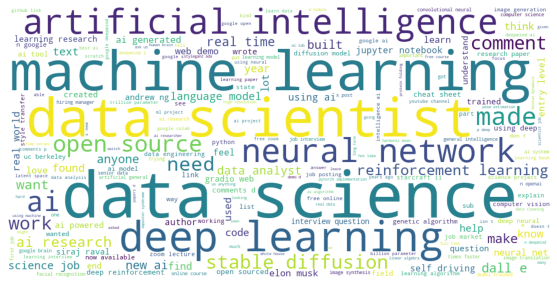

In [8]:
post_title_text= ' '.join([title for title in df['post_title'].str.lower()])

word_cloud=WordCloud(collocation_threshold=2, width=1000, height=500,
                    background_color='white').generate(post_title_text)

plt.figure(figsize=(10,5))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [9]:
sentiment_classifier = pipeline(
    "sentiment-analysis",
    model="cardiffnlp/twitter-roberta-base-sentiment",
    tokenizer="cardiffnlp/twitter-roberta-base-sentiment"
)

In [19]:
# conda install pytorch torchvision torchaudio -c pytorch

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - pytorch
    - torchaudio
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.01.10 |       hecd8cb5_0         121 KB
    certifi-2022.12.7          |   py37hecd8cb5_0         151 KB
    libuv-1.44.2               |       h6c40b1e_0         388 KB
    ninja-1.10.2               |       hf7b0b51_1         106 KB
    openssl-1.1.1t             |       hca72f7f_0         3.3 MB
    pytorch-1.7.1              |          py3.7_0        64.5 MB  pytorch
    torchaudio-0.7.2           |             py37         3.9 MB  pytorch
    torchvision-0.8.2          |         py37_cpu         6.6 MB  pytorch
    ------------------------------------------------------------
                                           Total:        79.0 MB

The following N

In [12]:
sentiment_classifier('i want to help you')

[{'label': 'LABEL_2', 'score': 0.6205688118934631}]

In [13]:
sentiment_classifier1 = pipeline(
    "sentiment-analysis",
    model="finiteautomata/bertweet-base-sentiment-analysis")

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [22]:
sentiment_classifier1('ho are you ?')

[{'label': 'NEU', 'score': 0.9523906111717224}]

In [23]:
def get_gentiment(text):
    try:
        sentiment=sentiment_classifier(text)[0]['label']
    except:
        sentiment= 'Not classified'
    return sentiment

In [27]:
comments_posts_df_sub=df[df['post_title'].str.contains('gpt')]
comments_posts_df_sub

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year
228,fvwwzj,MachineLearning,1.586172e+09,**The Orange Erotic Bible** \nI fine-tuned a ...,https://www.reddit.com/r/MachineLearning/comme...,"[Project] If gpt-2 read erotica, what would be...",Project,1078,150,0.95,2020-04-06 04:11:57,2020
1821,11vd31k,artificial,1.679206e+09,NaN,https://i.redd.it/7q56s81vgooa1.png,I got access to gpt-4 and I am using it for th...,Discussion,303,29,0.97,2023-03-18 23:02:41,2023
1957,1174kud,artificial,1.676893e+09,NaN,https://i.redd.it/g6c8lxiygdja1.jpg,"fine, let's just get chatgpt cancelled💀",News,267,55,0.80,2023-02-20 03:42:57,2023
2393,128ccfj,artificial,1.680327e+09,NaN,https://i.redd.it/jj9g2t5e29ra1.jpg,Chatgpt virtual hug 😀,ChatGPT,140,6,0.92,2023-03-31 22:27:17,2023
2608,119b4yx,artificial,1.677097e+09,NaN,https://v.redd.it/shr9vl2btsja1,GPT for Forms: Free Addon to Generate Forms Qu...,Project,109,19,0.94,2023-02-22 12:19:44,2023
2620,104nxq2,artificial,1.672990e+09,"after using chatgpt for a couple of weeks, ive...",https://www.reddit.com/r/artificial/comments/1...,chatgpt has massively improved my productivity...,Question,106,18,0.93,2023-01-05 23:25:29,2023


In [28]:
comments_posts_df_sub['sentiment']=comments_posts_df_sub['comment'].astype(str).apply(lambda x: get_sentiment(x))
comments_posts_df_sub

KeyError: 'comment'

In [33]:
comments_posts_df_sub.columns

Index(['post_id', 'subreddit', 'created_utc', 'selftext', 'post_url',
       'post_title', 'link_flair_text', 'score', 'num_comments',
       'upvote_ratio', 'created_date', 'created_year'],
      dtype='object')